# Particle Swarm Optimization for Neural Network Weight Initialization

This notebook demonstrates the use of Particle Swarm Optimization (PSO) for initializing weights in a neural network, comparing it to standard random initialization.


## Import libraries and modules


In [1]:
import sys
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt

# Add path to access src modules
sys.path.append('..')

# Import modules from src
from src.models import SimpleANN, PSO
from src.utils import create_fitness_function, evaluate_model, train_model, plot_results
from src.data import load_breast_cancer_data, get_dataset_info

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Data Preparation


In [2]:
# Load breast cancer data
X_train, X_test, y_train, y_test = load_breast_cancer_data()

# Get dataset information
dataset_info = get_dataset_info(X_train, X_test, y_train, y_test)
print("Wisconsin Breast Cancer Dataset Info:")
for key, value in dataset_info.items():
    print(f"  {key}: {value}")

Wisconsin Breast Cancer Dataset Info:
  n_train_samples: 455
  n_test_samples: 114
  n_features: 30
  is_binary: True
  classes: [0.0, 1.0]
  class_distribution_train: {'positive': 0.6285714507102966, 'negative': 0.37142857909202576}
  class_distribution_test: {'positive': 0.6228070259094238, 'negative': 0.37719297409057617}


## Experiment Setup


In [3]:
# Setup experiment
input_size = X_train.shape[1]  # Number of features
hidden_size = 16
output_size = 1  # Binary classification

# Neural network hyperparameters
epochs = 100
learning_rate = 0.01

# PSO hyperparameters
n_particles = 30
n_iterations = 100

print(f"Model architecture: {input_size}-{hidden_size}-{output_size}")
print(f"Total parameters: {input_size * hidden_size + hidden_size + hidden_size * output_size + output_size}")

Model architecture: 30-16-1
Total parameters: 513


## Create and Initialize Models


In [4]:
# Create models with standard initialization
standard_model = SimpleANN(input_size, hidden_size, output_size)
pso_model = SimpleANN(input_size, hidden_size, output_size)

total_params = standard_model.get_total_params()
print(f"Total parameters in model: {total_params}")

# Setup PSO
criterion = nn.BCELoss()
fitness_function = create_fitness_function(pso_model, X_train, y_train, criterion)

print("Starting PSO optimization...")
pso = PSO(n_particles=n_particles, n_dimensions=total_params, fitness_function=fitness_function)
best_weights, best_score, pso_history = pso.optimize(n_iterations=n_iterations)


Total parameters in model: 513
Starting PSO optimization...
Iteration 0, Best Score: 0.495054
Iteration 10, Best Score: 0.182343
Iteration 20, Best Score: 0.150158
Iteration 30, Best Score: 0.143174
Iteration 40, Best Score: 0.139517
Iteration 50, Best Score: 0.137950
Iteration 60, Best Score: 0.137199
Iteration 70, Best Score: 0.137150
Iteration 80, Best Score: 0.137141
Iteration 90, Best Score: 0.137105
PSO optimization completed in 0.25 seconds


## Evaluate Models Before Training


In [5]:
# Set best weights from PSO to model
pso_model.set_weights(best_weights)

# Evaluate before training
standard_init_acc = evaluate_model(standard_model, X_test, y_test)
pso_init_acc = evaluate_model(pso_model, X_test, y_test)

print("Accuracy before training:")
print(f"  Standard initialization: {standard_init_acc:.4f}")
print(f"  PSO initialization: {pso_init_acc:.4f}")

Accuracy before training:
  Standard initialization: 0.4561
  PSO initialization: 0.9649


## Train Models


In [6]:
# Train standard model
print("Training with standard initialization...")
standard_history = train_model(standard_model, X_train, y_train, X_test, y_test, 
                              epochs=epochs, lr=learning_rate)

# Train model with PSO initialization
print("\nTraining with PSO initialization...")
pso_history_train = train_model(pso_model, X_train, y_train, X_test, y_test, 
                               epochs=epochs, lr=learning_rate)

Training with standard initialization...
Epoch 0, Loss: 0.7281, Train Acc: 0.6198, Test Acc: 0.6754
Epoch 10, Loss: 0.2560, Train Acc: 0.9253, Test Acc: 0.9474
Epoch 20, Loss: 0.1219, Train Acc: 0.9648, Test Acc: 0.9737
Epoch 30, Loss: 0.0804, Train Acc: 0.9780, Test Acc: 0.9825
Epoch 40, Loss: 0.0644, Train Acc: 0.9802, Test Acc: 0.9912
Epoch 50, Loss: 0.0558, Train Acc: 0.9824, Test Acc: 0.9912
Epoch 60, Loss: 0.0504, Train Acc: 0.9846, Test Acc: 0.9825
Epoch 70, Loss: 0.0459, Train Acc: 0.9890, Test Acc: 0.9825
Epoch 80, Loss: 0.0420, Train Acc: 0.9912, Test Acc: 0.9825
Epoch 90, Loss: 0.0385, Train Acc: 0.9912, Test Acc: 0.9825
Training completed in 0.09 seconds

Training with PSO initialization...
Epoch 0, Loss: 0.1371, Train Acc: 0.9560, Test Acc: 0.9737
Epoch 10, Loss: 0.0690, Train Acc: 0.9824, Test Acc: 0.9825
Epoch 20, Loss: 0.0451, Train Acc: 0.9934, Test Acc: 0.9737
Epoch 30, Loss: 0.0295, Train Acc: 0.9934, Test Acc: 0.9737
Epoch 40, Loss: 0.0182, Train Acc: 0.9956, Test A

## Visualize Results


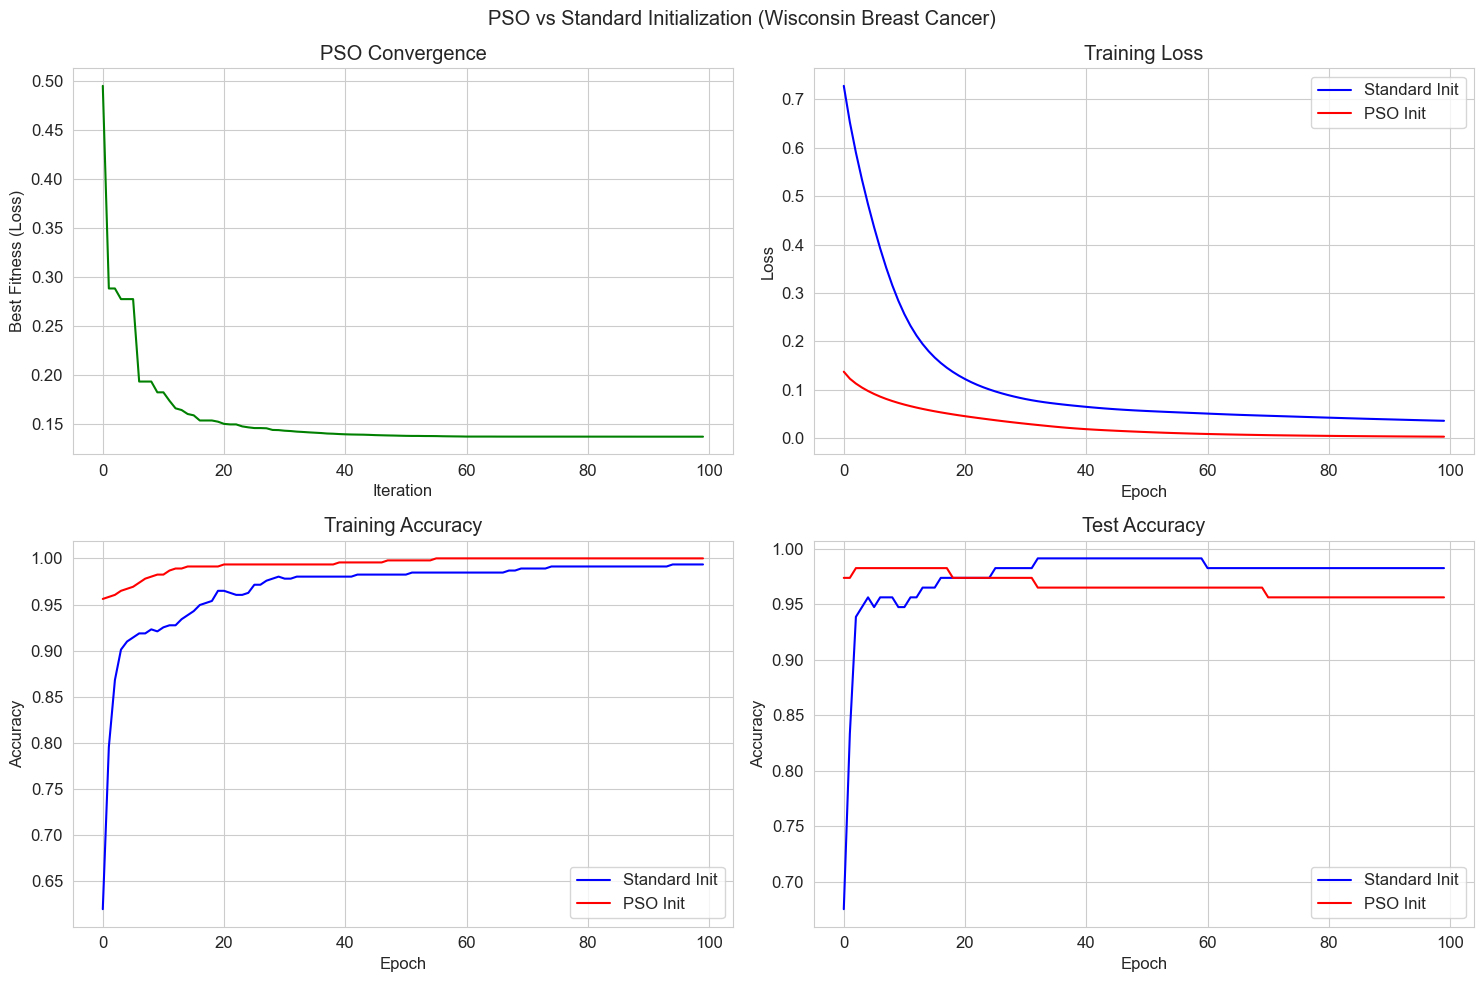

In [7]:
# Plot results
plot_results(pso_history, standard_history, pso_history_train, 
             title="PSO vs Standard Initialization (Wisconsin Breast Cancer)",
             save_path="../notebooks/comparison.png")